In [1]:
import numpy as np
from scipy import sparse
import pandas as pd
from preamble import *
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
citibike = mglearn.datasets.load_citibike()

In [50]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64


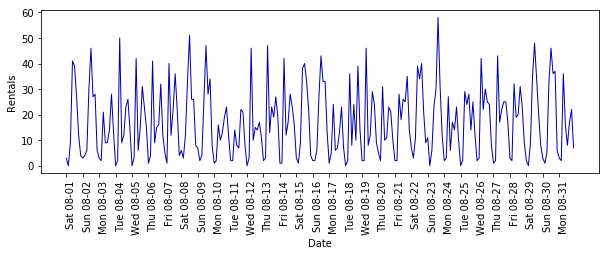

In [4]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), 
                       end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [6]:
# extract the target values (number of rentals)
y = citibike.values
# convert the time to POSIX time using "%s"
X = citibike.index.strftime("%s").astype("int").reshape(-1, 1)

In [29]:
# use the first 184 data points for training 
# and the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(
        regressor.score(X_test, y_test)))
    # predict on test data
    y_pred = regressor.predict(X_test)
    # prediction on the training data
    y_pred_train = regressor.predict(X_train)
    # define the plot size
    plt.figure(figsize=(20, 6))
    # create xticks for every date
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), 
               rotation=90, ha='left')
    # plot the trainings data
    plt.plot(range(n_train), y_train, label="train")
    # plot the test data
    plt.plot(range(n_train, len(y_test) + n_train), 
             y_test, '-', label="test")
    # plot the prediction on training data
    plt.plot(range(n_train), y_pred_train, '--', 
             label="prediction train")
    # plot the prediction on test data
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
            label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


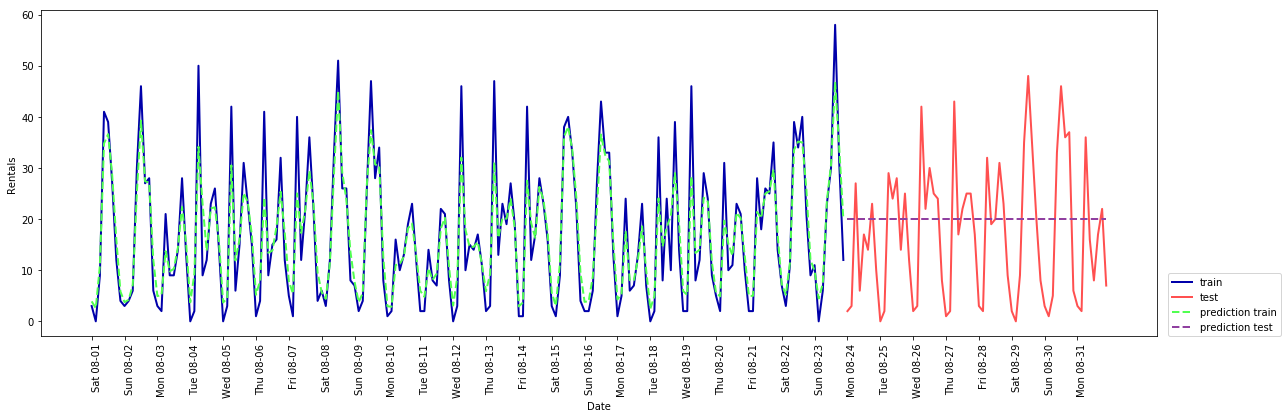

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

In [31]:
X_hour = np.array(citibike.index.hour).reshape(-1, 1)

Test-set R^2: 0.60


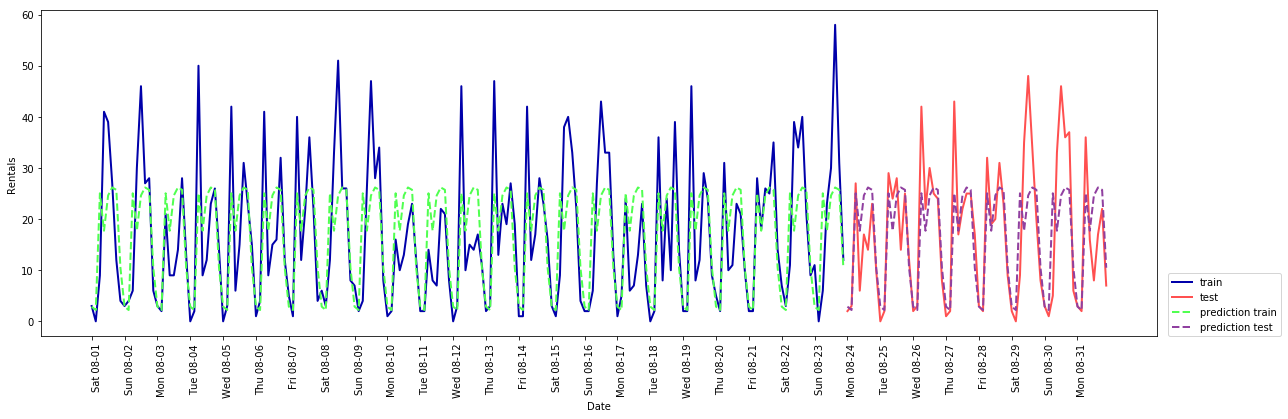

In [32]:
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


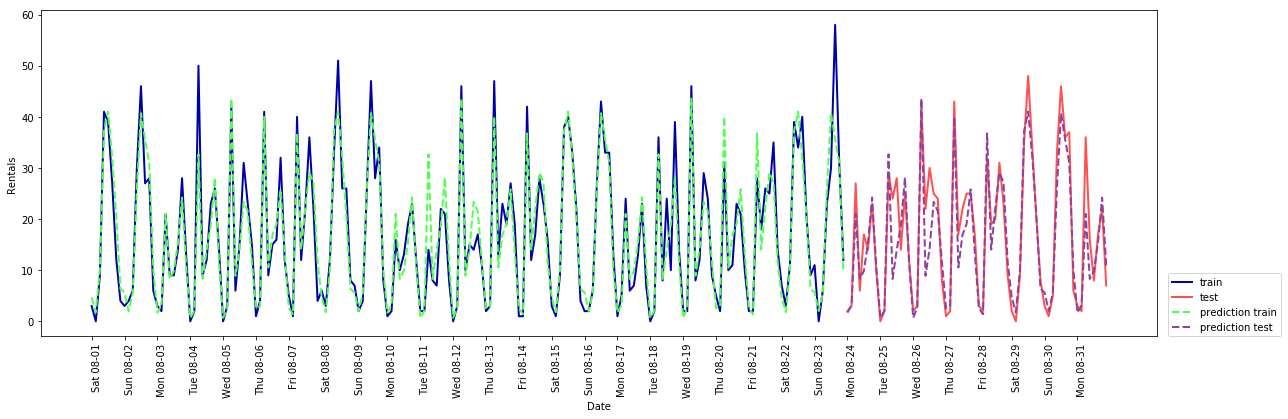

In [33]:
X_hour_week = np.hstack([
    np.array(citibike.index.dayofweek).reshape(-1, 1),
    np.array(citibike.index.hour).reshape(-1, 1)
])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


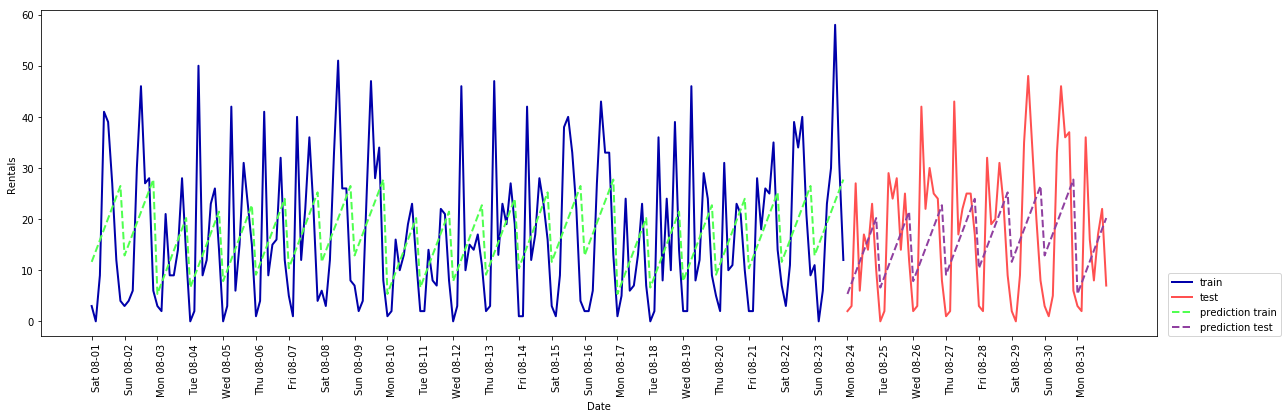

In [34]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


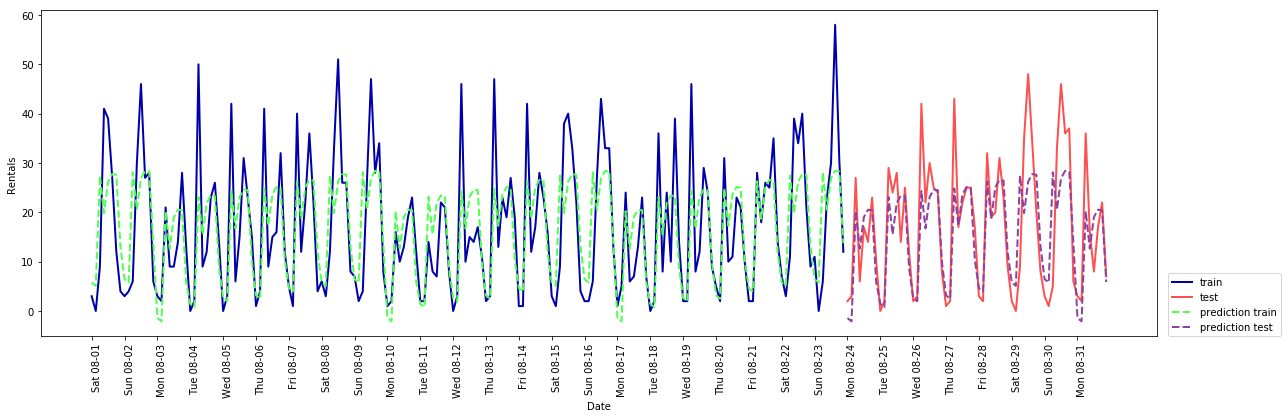

In [36]:
from sklearn.linear_model import Ridge
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


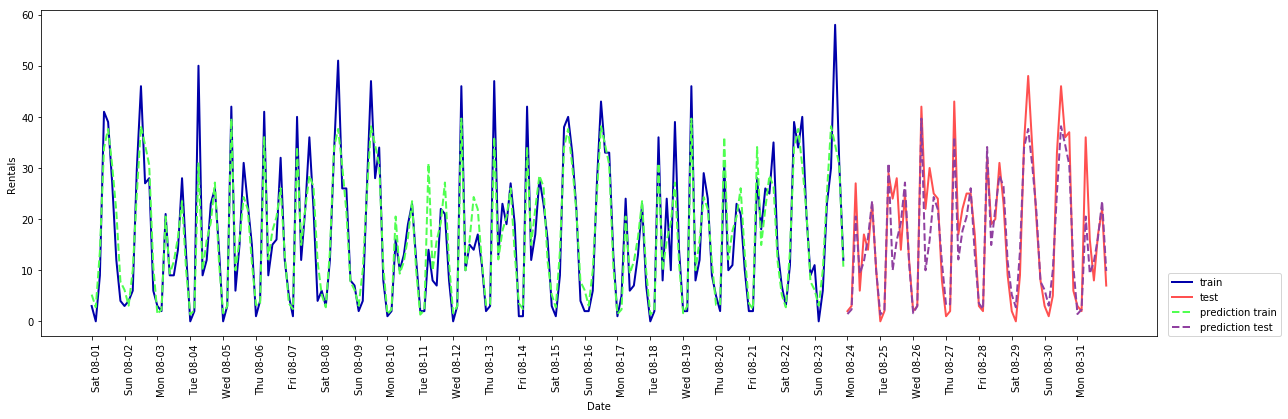

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(
    X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [43]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [47]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

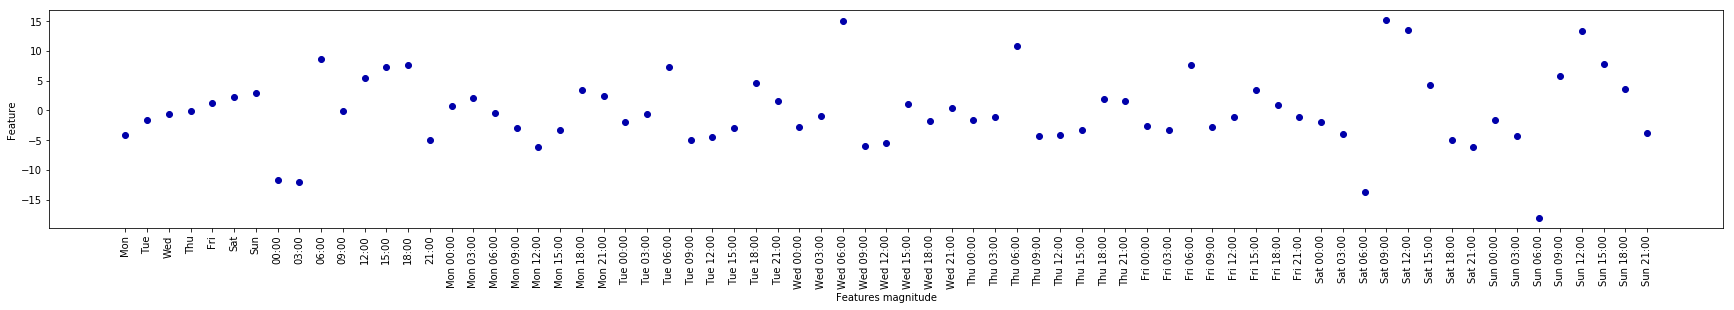

In [49]:
plt.figure(figsize=(30, 4))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), 
           features_nonzero, rotation=90)
plt.xlabel("Features magnitude")
plt.ylabel("Feature")

In [56]:
print("X.shape: {}".format(X.shape))
print("X_hour.shape: {}".format(X_hour.shape))
print("X_hour_week.shape: {}".format(X_hour_week.shape))
print("X_hour_week_onehot.shape: {}".format(
    X_hour_week_onehot.shape))
print("X_hour_week_onehot_poly.shape: {}".format(
    X_hour_week_onehot_poly.shape))

X.shape: (248, 1)
X_hour.shape: (248, 1)
X_hour_week.shape: (248, 2)
X_hour_week_onehot.shape: (248, 15)
X_hour_week_onehot_poly.shape: (248, 120)


In [57]:
print("X[0]: {}".format(X[0]))
print("X_hour[0]: {}".format(X_hour[0]))
print("X_hour_week[0]: {}".format(X_hour_week[0]))
print("X_hour_week_onehot[0]: {}".format(X_hour_week_onehot[0]))
print("X_hour_week_onehot_poly[0]: {}".format(X_hour_week_onehot_poly[0]))

X[0]: [1438380000]
X_hour[0]: [0]
X_hour_week[0]: [5 0]
X_hour_week_onehot[0]: [ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
X_hour_week_onehot_poly[0]: [ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
